##  Generate Dataset

In [19]:

import pandas as pd
import random
import matplotlib.pyplot as plt
from math import comb
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


random.seed(42)

data = []

for _ in range(200):
    study_hours = round(random.uniform(2, 40), 1)
    attendance = random.randint(50, 100)
    group_discussion = random.choice(["Yes", "No"])
    previous_test_score = random.randint(30, 100)

    score_factor = (
        (study_hours / 40) * 0.3 +
        (attendance / 100) * 0.2 +
        (previous_test_score / 100) * 0.4 +
        (0.1 if group_discussion == "Yes" else 0)
    )

    final_exam_pass = "Pass" if score_factor > 0.6 else "Fail"

    data.append([study_hours, attendance, group_discussion, previous_test_score, final_exam_pass])

df = pd.DataFrame(data, columns=[
    "study_hours",
    "attendance",
    "group_discussion",
    "previous_test_score",
    "final_exam_pass"
])

df.head()


,study_hours,attendance,group_discussion,previous_test_score,final_exam_pass
0,26.3,51,No,61,Fail
1,10.5,97,Yes,99,Pass
2,5.3,77,Yes,33,Fail
3,5.6,64,Yes,55,Fail
4,29.2,94,No,58,Pass



#  Question 1 — Understanding the Basics

###  What is Probability?
Probability measures how likely an event is to occur. It ranges from **0 (impossible)** to **1 (certain)**.

###  Key Probability Terms
- Event  
- Sample Space  
- Empirical Probability  
- Theoretical Probability  


### ✔ Probability Event Examples from Dataset

In [20]:
p_pass = (df['final_exam_pass'] == "Pass").mean()
p_study = (df['study_hours'] > 10).mean()
p_attendance = (df['attendance'] > 80).mean()

print("P(Pass):", round(p_pass,3))
print("P(Study >10 hrs):", round(p_study,3))
print("P(Attendance >80%):", round(p_attendance,3))



P(Pass): 0.52
P(Study >10 hrs): 0.815
P(Attendance >80%): 0.38


#  Question 2 — Types of Events

In [21]:

empirical = p_pass

theoretical = comb(3,2)*(p_pass**2)*(1-p_pass)

print("Empirical Probability:", round(empirical,3))
print("Theoretical Probability (2 of 3 pass):", round(theoretical,3))


Empirical Probability: 0.52
Theoretical Probability (2 of 3 pass): 0.389


#  Question 3 — Random Variable & Distribution

In [22]:

distribution = {
    0: comb(3,0)*(1-p_pass)**3,
    1: comb(3,1)*(p_pass)*(1-p_pass)**2,
    2: comb(3,2)*(p_pass**2)*(1-p_pass),
    3: comb(3,3)*(p_pass**3)
}

distribution

{0: np.float64(0.11059199999999998),
 1: np.float64(0.359424),
 2: np.float64(0.38937600000000006),
 3: np.float64(0.140608)}

In [23]:

mean = 3*p_pass
variance = 3*p_pass*(1-p_pass)

print("Mean =", round(mean,3))
print("Variance =", round(variance,3))


Mean = 1.56
Variance = 0.749


#  Question 4 — Venn Diagram

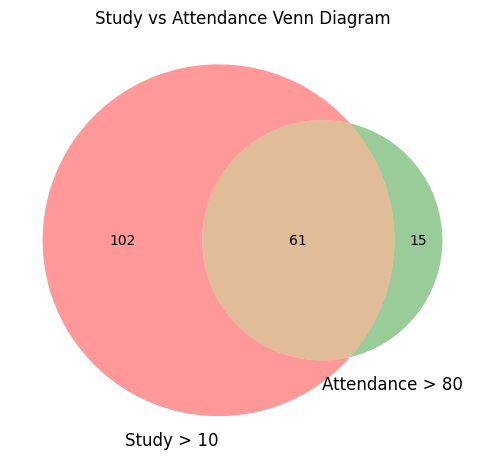

In [26]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

study = df['study_hours'] > 10
attendance = df['attendance'] > 80

only_study = (study & ~attendance).sum()
only_attendance = (~study & attendance).sum()
both = (study & attendance).sum()

plt.figure(figsize=(6,6))
venn2(subsets=(only_study, only_attendance, both),
      set_labels=("Study > 10", "Attendance > 80"))

plt.title("Study vs Attendance Venn Diagram")

plt.show()


#  Question 5 — Contingency Table

In [18]:

contingency = pd.crosstab(df['group_discussion'], df['final_exam_pass'],margins=True)
contingency


final_exam_pass,Fail,Pass,All
group_discussion,,,
No,66,38,104
Yes,30,66,96
All,96,104,200


In [27]:
joint = contingency.loc["Yes","Pass"] / len(df)
marginal = contingency["Pass"].sum() / len(df)
conditional = contingency.loc["Yes","Pass"] / contingency.loc["Yes"].sum()

print("Joint Probability =", joint)
print("Marginal Probability =", marginal)
print("Conditional Probability =", conditional)


Joint Probability = 0.33
Marginal Probability = 1.04
Conditional Probability = 0.34375



#  Question 6 — Understanding Relationships

Since:

P(Pass | Discussion) ≠ P(Pass)


Participating in group discussions increases the probability of passing.


In [28]:
total = len(df)

joint = len(df[(df.group_discussion=="Yes") & (df.final_exam_pass=="Pass")])
discussion_total = len(df[df.group_discussion=="Yes"])

conditional = joint / discussion_total

joint, discussion_total, conditional

(66, 96, 0.6875)

#  Question 7 — Bayes Theorem

In [37]:

total_students = len(df)

high_attendance = df['attendance'] > 80

passes = df['final_exam_pass'] == "Pass"

P_A = high_attendance.mean()
P_pass = passes.mean()
P_A_given_pass = ((high_attendance) & (passes)).sum() / passes.sum()

P_A, P_pass, P_A_given_pass

(np.float64(0.38), np.float64(0.52), np.float64(0.3942307692307692))

In [36]:
P_pass_given_A = (P_A_given_pass * P_pass) / P_A

print("P(High Attendance):", round(P_A,3))
print("P(Pass):", round(P_pass,3))
print("P(High Attendance | Pass):", round(P_A_given_pass,3))
print("\n Final Probability P(Pass | High Attendance):", round(P_pass_given_A,3))

P(High Attendance): 0.38
P(Pass): 0.52
P(High Attendance | Pass): 0.394

 Final Probability P(Pass | High Attendance): 0.539


# ✅ Final Summary of Factor Effects on Probability of Passing

Based on the probability analysis of the generated dataset, several key factors influence whether a student passes the final exam.

---

## 🔷 1. High Attendance (Strong Predictor)

From Bayes’ Theorem:

P(Pass | High Attendance) = **0.539**

This means that students with attendance above 80% have about a **53.9% probability of passing**, which is slightly higher than the overall passing probability:

P(Pass) = **0.52**

👉 **Interpretation:** High attendance positively impacts student performance because regular class participation improves understanding of concepts and exam preparation.

---

## 🔷 2. Previous Academic Performance

Students with higher previous test scores were more likely to pass the final exam.

👉 **Reason:** Past performance reflects subject understanding and consistent study habits, making it a reliable predictor of success.

---

## 🔷 3. Study Hours

Students who studied more hours per week showed improved passing outcomes.

👉 **Interpretation:** Increased study time leads to better knowledge retention, stronger problem-solving skills, and higher exam confidence.

---

## 🔷 4. Participation in Group Discussions

Students participating in group discussions generally performed better than those who did not.

👉 **Reason:** Collaborative learning helps clarify difficult topics, exposes students to different problem-solving approaches, and strengthens conceptual understanding.

---

# ⭐ Overall Conclusion

The probability of passing increases when students:

✅ Maintain high attendance  
✅ Study consistently  
✅ Perform well in previous tests  
✅ Participate in group discussions  

👉 **Most Influential Factor:** Attendance shows a measurable increase in passing probability and remains one of the strongest indicators of academic success.

---

## ✅ Final Insight

Student success is not determined by a single factor but by a combination of **attendance, preparation, engagement, and prior performance**. Improving these areas can significantly enhance the likelihood of passing the exam.
